In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

import matplotlib.pyplot as plt
import numpy as np

In [19]:
noise_level = 0
filename = f'm{noise_level}'

!if ! ls /tmp/{filename}_train.h5; \
    wget https://storage.gorchilov.net/datasets/{filename}.tar.gz -O /tmp/{filename}.tar.gz && \
    tar -xf /tmp/{filename}.tar.gz -C /tmp; \
    end

import h5py

train = h5py.File(f'/tmp/{filename}_train.h5', mode='r')
test = h5py.File(f'/tmp/{filename}_test.h5', mode='r')

train_X = train['data'][:]
train_y = train['labels'][:]

test_X = test['data'][:]
test_y = test['labels'][:]

/tmp/m0_train.h5


In [3]:
def schedule(epoch, lr) -> float:
    if epoch > 200 and epoch % 50 == 0:
        return lr * math.exp(-0.1)
    return lr
scheduler = LearningRateScheduler(schedule)

In [10]:
clear_session()

model = Sequential([
                    LSTM(16, input_shape=(4, 1000)),
                    Dense(64, activation='relu'),
#                     Dropout(0.2),
#                     Dense(32, activation='relu'),
#                     Dropout(0.2),
                    Dense(1, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                65088     
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 66,241
Trainable params: 66,241
Non-trainable params: 0
_________________________________________________________________


In [11]:
# optimizer = RMSprop(ExponentialDecay(0.01, decay_steps=100000, decay_rate=0.1))
optimizer = Adam()

model.compile(optimizer=optimizer, loss='mae')

In [12]:
history = model.fit(train_X[:],
                    train_y[:],
                    epochs=500,
                    callbacks=[scheduler]
)

Epoch 1/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1411.9546 - lr: 0.0010
Epoch 2/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1411.4707 - lr: 0.0010
Epoch 3/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1410.9772 - lr: 0.0010
Epoch 4/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1410.5275 - lr: 0.0010
Epoch 5/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1410.1252 - lr: 0.0010
Epoch 6/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1409.5920 - lr: 0.0010
Epoch 7/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1408.6116 - lr: 0.0010
Epoch 8/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1406.9248 - lr: 0.0010
Epoch 9/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1404.1840 - lr: 0.0010
Epoch 10/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1400.7117 - lr: 0.0010

3125/3125 [==============================] - 4s 1ms/step - loss: 659.3615 - lr: 0.0010
Epoch 83/500
3125/3125 [==============================] - 4s 1ms/step - loss: 656.5444 - lr: 0.0010
Epoch 84/500
3125/3125 [==============================] - 4s 1ms/step - loss: 654.6723 - lr: 0.0010
Epoch 85/500
3125/3125 [==============================] - 4s 1ms/step - loss: 654.6092 - lr: 0.0010
Epoch 86/500
3125/3125 [==============================] - 4s 1ms/step - loss: 648.9416 - lr: 0.0010
Epoch 87/500
3125/3125 [==============================] - 4s 1ms/step - loss: 646.0688 - lr: 0.0010
Epoch 88/500
3125/3125 [==============================] - 4s 1ms/step - loss: 645.2887 - lr: 0.0010
Epoch 89/500
3125/3125 [==============================] - 4s 1ms/step - loss: 642.3237 - lr: 0.0010
Epoch 90/500
3125/3125 [==============================] - 4s 1ms/step - loss: 641.6976 - lr: 0.0010
Epoch 91/500
3125/3125 [==============================] - 4s 1ms/step - loss: 639.3224 - lr: 0.0010
Epoch 92/500


3125/3125 [==============================] - 4s 1ms/step - loss: 553.2381 - lr: 0.0010
Epoch 164/500
3125/3125 [==============================] - 4s 1ms/step - loss: 554.7285 - lr: 0.0010
Epoch 165/500
3125/3125 [==============================] - 4s 1ms/step - loss: 552.1175 - lr: 0.0010
Epoch 166/500
3125/3125 [==============================] - 4s 1ms/step - loss: 554.1486 - lr: 0.0010
Epoch 167/500
3125/3125 [==============================] - 5s 2ms/step - loss: 551.6364 - lr: 0.0010
Epoch 168/500
3125/3125 [==============================] - 5s 1ms/step - loss: 551.8607 - lr: 0.0010
Epoch 169/500
3125/3125 [==============================] - 5s 2ms/step - loss: 548.8696 - lr: 0.0010
Epoch 170/500
3125/3125 [==============================] - 5s 1ms/step - loss: 549.7902 - lr: 0.0010
Epoch 171/500
3125/3125 [==============================] - 5s 2ms/step - loss: 547.3364 - lr: 0.0010
Epoch 172/500
3125/3125 [==============================] - 4s 1ms/step - loss: 547.4205 - lr: 0.0010
Epoc

3125/3125 [==============================] - 4s 1ms/step - loss: 511.3549 - lr: 0.0010
Epoch 245/500
3125/3125 [==============================] - 4s 1ms/step - loss: 509.2137 - lr: 0.0010
Epoch 246/500
3125/3125 [==============================] - 4s 1ms/step - loss: 509.1274 - lr: 0.0010
Epoch 247/500
3125/3125 [==============================] - 4s 1ms/step - loss: 508.4454 - lr: 0.0010
Epoch 248/500
3125/3125 [==============================] - 4s 1ms/step - loss: 507.8340 - lr: 0.0010
Epoch 249/500
3125/3125 [==============================] - 4s 1ms/step - loss: 508.8043 - lr: 0.0010
Epoch 250/500
3125/3125 [==============================] - 4s 1ms/step - loss: 507.0021 - lr: 0.0010
Epoch 251/500
3125/3125 [==============================] - 4s 1ms/step - loss: 503.8923 - lr: 9.0484e-04
Epoch 252/500
3125/3125 [==============================] - 5s 1ms/step - loss: 497.9435 - lr: 9.0484e-04
Epoch 253/500
3125/3125 [==============================] - 4s 1ms/step - loss: 497.2333 - lr: 9.0

3125/3125 [==============================] - 4s 1ms/step - loss: 466.7293 - lr: 8.1873e-04
Epoch 323/500
3125/3125 [==============================] - 4s 1ms/step - loss: 466.0646 - lr: 8.1873e-04
Epoch 324/500
3125/3125 [==============================] - 4s 1ms/step - loss: 466.4295 - lr: 8.1873e-04
Epoch 325/500
3125/3125 [==============================] - 4s 1ms/step - loss: 466.4229 - lr: 8.1873e-04
Epoch 326/500
3125/3125 [==============================] - 4s 1ms/step - loss: 464.9991 - lr: 8.1873e-04
Epoch 327/500
3125/3125 [==============================] - 4s 1ms/step - loss: 465.1261 - lr: 8.1873e-04
Epoch 328/500
3125/3125 [==============================] - 4s 1ms/step - loss: 465.3374 - lr: 8.1873e-04
Epoch 329/500
3125/3125 [==============================] - 4s 1ms/step - loss: 464.3347 - lr: 8.1873e-04
Epoch 330/500
3125/3125 [==============================] - 4s 1ms/step - loss: 465.1389 - lr: 8.1873e-04
Epoch 331/500
3125/3125 [==============================] - 4s 1ms/ste

3125/3125 [==============================] - 4s 1ms/step - loss: 445.9131 - lr: 7.4082e-04
Epoch 401/500
3125/3125 [==============================] - 4s 1ms/step - loss: 444.6007 - lr: 6.7032e-04
Epoch 402/500
3125/3125 [==============================] - 4s 1ms/step - loss: 439.3011 - lr: 6.7032e-04
Epoch 403/500
3125/3125 [==============================] - 4s 1ms/step - loss: 439.7430 - lr: 6.7032e-04
Epoch 404/500
3125/3125 [==============================] - 4s 1ms/step - loss: 438.9298 - lr: 6.7032e-04
Epoch 405/500
3125/3125 [==============================] - 4s 1ms/step - loss: 437.8228 - lr: 6.7032e-04
Epoch 406/500
3125/3125 [==============================] - 4s 1ms/step - loss: 438.9910 - lr: 6.7032e-04
Epoch 407/500
3125/3125 [==============================] - 4s 1ms/step - loss: 437.9915 - lr: 6.7032e-04
Epoch 408/500
3125/3125 [==============================] - 4s 1ms/step - loss: 438.4428 - lr: 6.7032e-04
Epoch 409/500
3125/3125 [==============================] - 4s 1ms/ste

3125/3125 [==============================] - 4s 1ms/step - loss: 425.4604 - lr: 6.0653e-04
Epoch 479/500
3125/3125 [==============================] - 4s 1ms/step - loss: 425.7314 - lr: 6.0653e-04
Epoch 480/500
3125/3125 [==============================] - 4s 1ms/step - loss: 424.1207 - lr: 6.0653e-04
Epoch 481/500
3125/3125 [==============================] - 4s 1ms/step - loss: 424.3275 - lr: 6.0653e-04
Epoch 482/500
3125/3125 [==============================] - 4s 1ms/step - loss: 425.0806 - lr: 6.0653e-04
Epoch 483/500
3125/3125 [==============================] - 4s 1ms/step - loss: 424.7306 - lr: 6.0653e-04
Epoch 484/500
3125/3125 [==============================] - 4s 1ms/step - loss: 424.2133 - lr: 6.0653e-04
Epoch 485/500
3125/3125 [==============================] - 4s 1ms/step - loss: 425.1998 - lr: 6.0653e-04
Epoch 486/500
3125/3125 [==============================] - 4s 1ms/step - loss: 424.2009 - lr: 6.0653e-04
Epoch 487/500
3125/3125 [==============================] - 4s 1ms/ste

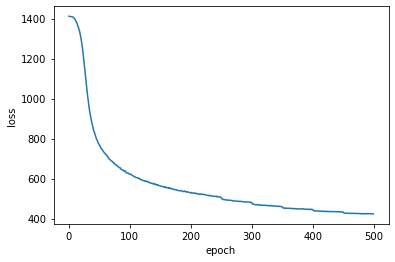

In [13]:
start = 0
end = 500

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

In [8]:
model.evaluate(test_X[:], test_y[:])

313/313 [==============================] - 0s 812us/step - loss: 5881.3062


5881.30615234375

In [20]:
model.evaluate(test_X[:], test_y[:])

313/313 [==============================] - 0s 854us/step - loss: 4799.6758


4799.67578125

In [50]:
model.save(f'model_saves/lstm-{noise_level}.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets
model/
model/assets/
model/variables/
model/variables/variables.index
model/variables/variables.data-00001-of-00002
model/variables/variables.data-00000-of-00002
model/saved_model.pb
